In [1]:
import numpy as np
from numba import jit

@jit(nopython=True)
def lloss(w1,w2,a,b):
    loss = (1-a)*(1-b)*(w1+w2-1)**2 + a*b*(w1+w2+1)**2 + (1-a)*b*(w1-w2-1)**2 + a*(1-b)*(w1-w2+1)**2
    return 0.5 * loss

@jit(nopython=True)
def irmv1_loss(w1,w2,a,b,lam):
    loss = (1-a)*(1-b)*(w1+w2-1)**2 + a*b*(w1+w2+1)**2 + (1-a)*b*(w1-w2-1)**2 + a*(1-b)*(w1-w2+1)**2
    re = (1-a)*(1-b)*(w1+w2-1)*(w1+w2) + a*b*(w1+w2+1)*(w1+w2) + (1-a)*b*(w1-w2-1)*(w1-w2) + a*(1-b)*(w1-w2+1)*(w1-w2)
    return 0.5 * loss + lam*(re**2)

@jit(nopython=True)
def icorr_loss(w1,w2,a,b1,b2,lam):
    loss1 = (1-a)*(1-b1)*(w1+w2-1)**2 + a*b1*(w1+w2+1)**2 + (1-a)*b1*(w1-w2-1)**2 + a*(1-b1)*(w1-w2+1)**2
    re1 = (1-a)*(1-b1)*(w1+w2) - a*b1*(w1+w2) + (1-a)*b1*(w1-w2) - a*(1-b1)*(w1-w2)
    
    loss2 = (1-a)*(1-b2)*(w1+w2-1)**2 + a*b2*(w1+w2+1)**2 + (1-a)*b2*(w1-w2-1)**2 + a*(1-b2)*(w1-w2+1)**2
    re2 = (1-a)*(1-b2)*(w1+w2) - a*b2*(w1+w2) + (1-a)*b2*(w1-w2) - a*(1-b2)*(w1-w2)
    return 0.5 * (loss1+loss2) + lam*(re1-re2)**2

In [2]:
#ERM
LL = 100
ww1 = 0
ww2 = 0
for ii in range(-1000,1000):
    for jj in range(-1000,1000):
        w1 = ii/1000
        w2 = jj/1000
        ll = lloss(w1,w2,0.1,0.2) + lloss(w1,w2,0.1,0.25)
        if ll<LL:
            LL = ll
            ww1 = w1
            ww2 = w2

In [3]:
print(lloss(ww1,ww2,0.1,0.2))
print(lloss(ww1,ww2,0.1,0.25))
print(lloss(ww1,ww2,0.1,0.7))
print(lloss(ww1,ww2,0.1,0.9))

0.15020136000000003
0.16118280000000001
0.26001576000000004
0.30394152


In [4]:
#IRMv1
phi1 = []
phi2 = []

for i in range(-1,28):
    if i==-1:
        lam = 0
    else:
        lam = 2**i
    LL = 100
    ww1 = 0
    ww2 = 0
    for ii in range(6000,7000):
        for jj in range(2200,3500):
            w1 = ii/10000
            w2 = jj/10000
            ll = irmv1_loss(w1,w2,0.1,0.2,lam) + irmv1_loss(w1,w2,0.1,0.25,lam)
            if ll<LL:
                LL = ll
                ww1 = w1
                ww2 = w2
    #print(i)
    phi1.append(ww1+ww2)
    phi2.append(ww1-ww2)

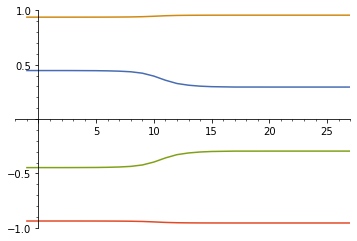

In [5]:
#IRMv1 output
x = []
for i in range(-1,28):
    x.append(i)
    
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

fig, ax = plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))


x_major_locator=MultipleLocator(5)
y_major_locator=MultipleLocator(0.5)
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
yticks = ax.yaxis.get_major_ticks() 
yticks[3].label1.set_visible(False)
xticks = ax.xaxis.get_major_ticks() 
xticks[1].label1.set_visible(False)

xminorLocator = MultipleLocator(1) 
ax.xaxis.set_minor_locator(xminorLocator)
yminorLocator = MultipleLocator(0.1) 
ax.yaxis.set_minor_locator(yminorLocator)

plt.rcParams['figure.figsize'] = (6.0, 4.0)
plt.rcParams['savefig.dpi'] = 300 
plt.rcParams['figure.dpi'] = 300

plt.plot(x,phi1,color=(208/255, 138/255, 17/255))
plt.plot(x,phi2,color=(71/255, 108/255, 179/255))

plt.plot(x,-np.array(phi1),color=(227/255, 73/255, 37/255))
plt.plot(x,-np.array(phi2),color=(128/255, 161/255, 22/255))

plt.ylim((-1, 1))
plt.xlim((-2, 27))
plt.show()

In [6]:
#ICorr
phi1 = []
phi2 = []
for i in range(-1,28):
    if i==-1:
        lam = 0
    else:
        lam = 2**i
        
    LL = 100
    ww1 = 0
    ww2 = 0
    for ii in range(1000):
        for jj in range(1000):
            w1 = ii/1000
            w2 = jj/1000
            ll = icorr_loss(w1,w2,0.1,0.2,0.25,lam)
            if ll<LL:
                LL = ll
                ww1 = w1
                ww2 = w2
    #print(i)
    phi1.append(ww1+ww2)
    phi2.append(ww1-ww2)

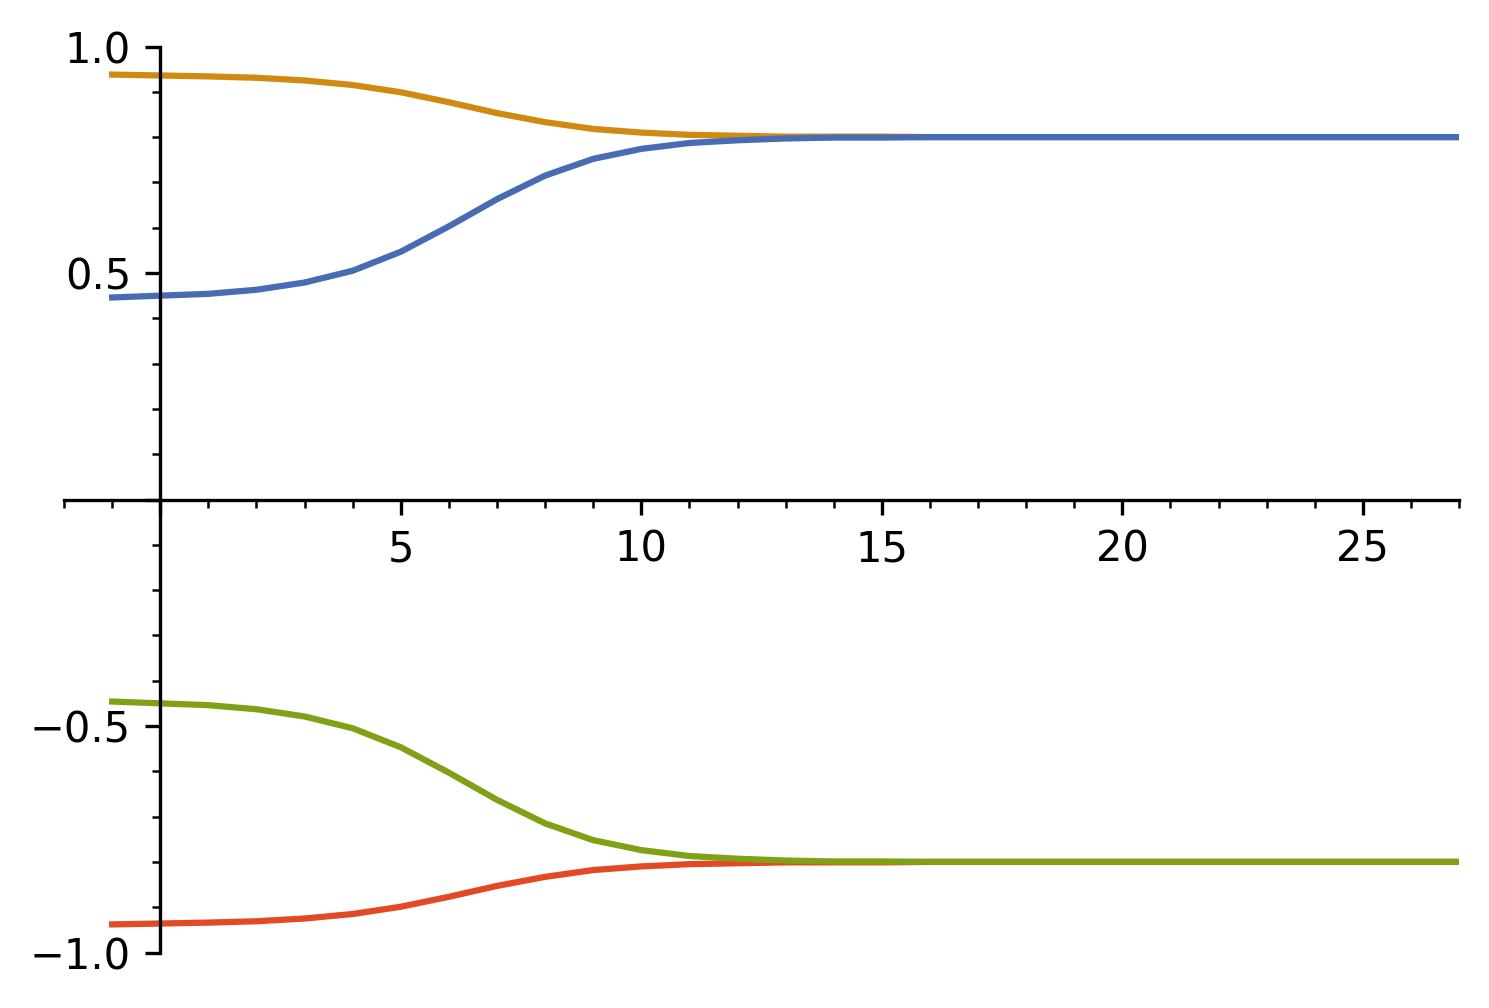

In [7]:
x = []
for i in range(-1,28):
    x.append(i)
    
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

fig, ax = plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))

x_major_locator=MultipleLocator(5)
y_major_locator=MultipleLocator(0.5)
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
yticks = ax.yaxis.get_major_ticks() 
yticks[3].label1.set_visible(False)
xticks = ax.xaxis.get_major_ticks() 
xticks[1].label1.set_visible(False)

xminorLocator = MultipleLocator(1) 
ax.xaxis.set_minor_locator(xminorLocator)
yminorLocator = MultipleLocator(0.1) 
ax.yaxis.set_minor_locator(yminorLocator)

plt.rcParams['figure.figsize'] = (6.0, 4.0)
plt.rcParams['savefig.dpi'] = 300 
plt.rcParams['figure.dpi'] = 300

plt.plot(x,phi1,color=(208/255, 138/255, 17/255))
plt.plot(x,phi2,color=(71/255, 108/255, 179/255))

plt.plot(x,-np.array(phi1),color=(227/255, 73/255, 37/255))
plt.plot(x,-np.array(phi2),color=(128/255, 161/255, 22/255))

plt.ylim((-1, 1))
plt.xlim((-2, 27))
plt.show()